In [2]:
import ctypes
import os
import numpy as np
import matplotlib.pyplot as plt
import src.error_model
from src.gp_inference import performGP
from plot_helper import plot_emission

In [9]:
mask = np.loadtxt("data/mask.txt")
measurement_line = np.loadtxt("ForwardModel/results/measurement/NN_ 66_line.txt")
measurement_vol = np.loadtxt("ForwardModel/results/measurement/NN_ 66_volume.txt")
params = np.array([250000, 0.07])
#print(error[50])

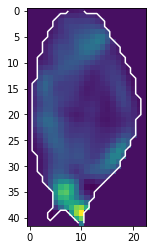

In [10]:
fit1, _ = performGP(measurement_vol, params)
plt.contour(mask, levels=[0.5], colors='white')
plt.imshow(fit1.reshape((42,23))*mask)

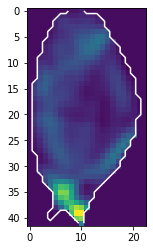

In [8]:
fit1, _ = performGP(measurement_line, params, transfer_mat="line")
plt.contour(mask, levels=[0.5], colors='white')
plt.imshow(fit1.reshape((42,23))*mask)

In [ ]:
# Implementation in python

In [42]:
def kernel_fnc(p1, p2, param):
    dp = p2-p1
    
    lr = 0.3 # 1
    sigma_rf = 0.5**0.5 
    rz_contrib1 = sigma_rf**2 * np.exp(- (dp[0]**2+dp[1]**2)/(2*lr**2))
        
    lr = 0.07 # 1
    sigma_rf = 0.5**0.5 
    rz_contrib2 = sigma_rf**2 * np.exp(- (dp[0]**2+dp[1]**2)/(2*lr**2))
    
    return rz_contrib1 + rz_contrib2
def kernel_mat(X,Y):
    sigma = np.zeros((X.size*Y.size, X.size*Y.size))
    for i1, x1 in enumerate(X):
        print(i1, end="", flush=True)
        for j1, y1 in enumerate(Y):
            p1 = np.array([x1, y1])
            sigma_x = j1*X.size + i1
            
            for i2, x2 in enumerate(X):
                for j2, y2 in enumerate(Y):
                    p2 = np.array([x2,y2])
                    sigma_y = j2*X.size + i2
                    
                    sigma[sigma_x,sigma_y] = kernel_fnc(p1,p2, params)
                            
    return sigma

In [4]:
r_coord = np.loadtxt("data/r_coordinates_reduced.txt")
z_coord = np.loadtxt("data/z_coordinates_reduced.txt")
transfer_mat = np.loadtxt("data/transfermatrix_line_reduced.txt")

012345678910111213141516171819202122

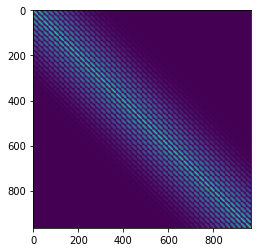

In [44]:
sigma = kernel_mat(r_coord, z_coord)
plt.imshow(sigma)

In [45]:
from timeit import default_timer as timer
from src.error_model import get_variance

In [46]:
sigma_d = np.diag(get_variance(measurement_vol))
sigma_d_inv = np.linalg.inv(sigma_d)
start = timer()
sigma_f_inv = np.linalg.inv(sigma * 4e8)
end = timer()
bla = transfer_mat.T @ sigma_d_inv @ transfer_mat + sigma_f_inv
print(end - start)

0.06674197300162632


In [49]:
res = np.linalg.inv(bla) @ transfer_mat.T @ sigma_d_inv @ measurement_line
print(res.shape)

(966,)


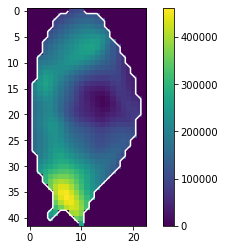

In [50]:
res[res<0] = 0
plt.contour(mask, levels=[0.5], colors='white')
img = plt.imshow(res.reshape(42,23)*mask)
plt.colorbar(img)

In [146]:
print(sigma)

[[6.65640000e+10 6.18034360e+10 4.94710591e+10 ... 4.76708572e-57
  2.27743113e-58 9.37626905e-60]
 [6.18034360e+10 6.65640000e+10 6.18047851e+10 ... 8.60841622e-56
  4.77039205e-57 2.27816812e-58]
 [4.94710591e+10 6.18047851e+10 6.65640000e+10 ... 1.33958212e-54
  8.61051650e-56 4.76977960e-57]
 ...
 [4.76708572e-57 8.60841622e-56 1.33958212e-54 ... 6.65640000e+10
  6.18055786e+10 4.94738541e+10]
 [2.27743113e-58 4.77039205e-57 8.61051650e-56 ... 6.18055786e+10
  6.65640000e+10 6.18043884e+10]
 [9.37626905e-60 2.27816812e-58 4.76977960e-57 ... 4.94738541e+10
  6.18043884e+10 6.65640000e+10]]


In [28]:
# Original Data consists of 83x45 pixels. This is too large for GPs.
# Therefore we downsample both the transfermatrix and the emmision data
def downsample_2x(mat):
    orig_dtype = mat.dtype
    mat = mat.astype(float)
    mat = (mat[...,1::2,:] + mat[...,:-1:2,:])/2.
    mat = (mat[...,:,1::2] + mat[...,:,:-1:2])/2.
    return mat.astype(orig_dtype)


original = np.zeros((85,47))
original[1:-1,1:-1] = np.genfromtxt("data/Input_emiss/NN_ 66.txt", 
                                         skip_header = 1).reshape(83, 45)[::-1]
emission = downsample_2x(original)*mask

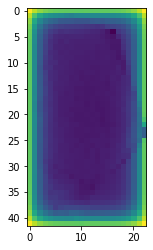

In [13]:
transfer_line = np.loadtxt("data/transfermatrix_line_reduced.txt").reshape(128,42,23)
print(transfer_line.shape)
transfer_vol = np.loadtxt("data/transfermatrix_volume_reduced.txt").reshape(128,42,23)
print(transfer_vol.shape)

(128, 42, 23)
(128, 42, 23)


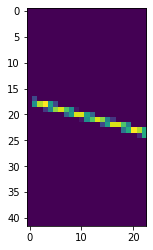

In [19]:
plt.imshow(transfer_line[28])

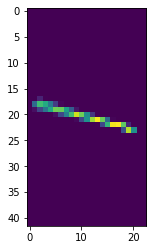

In [20]:
plt.imshow(transfer_vol[28])

(85, 47)


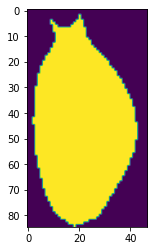

In [86]:
Ri = np.array([0.985543, 1.014445, 1.043335, 1.072225, 1.101115, 1.13    , 1.158885,
       1.187775, 1.216665, 1.245555, 1.274445, 1.303335, 1.332225,
       1.361115, 1.39    , 1.418885, 1.447775, 1.476665, 1.505555,
       1.534445, 1.563335, 1.592225, 1.621115, 1.65    , 1.678885,
       1.707775, 1.736665, 1.765555, 1.794445, 1.823335, 1.852225,
       1.881115, 1.91    , 1.938885, 1.967775, 1.996665, 2.025555,
       2.054445, 2.083335, 2.112225, 2.141115, 2.17    , 2.198885,
       2.227775, 2.256665, 2.285555, 2.314457])
zi = np.array([-1.2444422, -1.2155400e+00, -1.1866250e+00, -1.1577100e+00, -1.1287950e+00,
       -1.0998800e+00, -1.0709650e+00, -1.0420500e+00, -1.0131325e+00,
       -9.8421700e-01, -9.5530100e-01, -9.2638550e-01, -8.9747000e-01,
       -8.6855400e-01, -8.3963850e-01, -8.1072300e-01, -7.8180700e-01,
       -7.5289150e-01, -7.2397600e-01, -6.9506000e-01, -6.6614450e-01,
       -6.3722900e-01, -6.0831300e-01, -5.7939750e-01, -5.5048200e-01,
       -5.2156600e-01, -4.9265050e-01, -4.6373500e-01, -4.3481900e-01,
       -4.0590350e-01, -3.7698800e-01, -3.4807200e-01, -3.1915650e-01,
       -2.9024100e-01, -2.6132500e-01, -2.3240950e-01, -2.0349400e-01,
       -1.7457800e-01, -1.4566250e-01, -1.1674700e-01, -8.7831200e-02,
       -5.8915600e-02, -2.9999950e-02, -1.0843000e-03,  2.7831400e-02,
        5.6747100e-02,  8.5662950e-02,  1.1457850e-01,  1.4349400e-01,
        1.7240950e-01,  2.0132500e-01,  2.3024100e-01,  2.5915700e-01,
        2.8807250e-01,  3.1698800e-01,  3.4590350e-01,  3.7481900e-01,
        4.0373500e-01,  4.3265100e-01,  4.6156650e-01,  4.9048200e-01,
        5.1939750e-01,  5.4831300e-01,  5.7722900e-01,  6.0614450e-01,
        6.3506000e-01,  6.6397600e-01,  6.9289200e-01,  7.2180750e-01,
        7.5072300e-01,  7.7963850e-01,  8.0855400e-01,  8.3747000e-01,
        8.6638550e-01,  8.9530100e-01,  9.2421700e-01,  9.5313300e-01,
        9.8204850e-01,  1.0109630e+00,  1.0398800e+00,  1.0687950e+00,
        1.0977100e+00,  1.1266250e+00,  1.1555400e+00, 1.1844422])
import matplotlib.path as mplPath
vessel = np.genfromtxt('data/original/vessel_contour.csv', delimiter=',')
bbPath = mplPath.Path(vessel)
mask = np.zeros((len(zi), len(Ri)), dtype=bool)
for i in range(len(zi)):
    for j in range(len(Ri)):
        mask[i, j] = bbPath.contains_point((Ri[j], zi[i]))
mask[mask>0] = 1
print(mask.shape)
plt.imshow(mask)

In [97]:
z_coord = np.loadtxt("data/original/z_coord.txt")
r_coord = np.loadtxt("data/original/radial_coord.txt")
transfer_line = np.loadtxt("data/original/transfermatrix_line.txt").reshape(128,83,45)[:, ::-1, ::]
print(transfer_line.shape)
transfer_vol = np.loadtxt("data/original/transfermatrix_volume.txt").reshape(128,45,83)[:, ::, ::-1]
transfer_vol = np.swapaxes(transfer_vol, 1,2)
transfer_line2 = np.zeros((128,85,47))
transfer_line2[:, 1:-1, 1:-1] = transfer_line

(128, 83, 45)


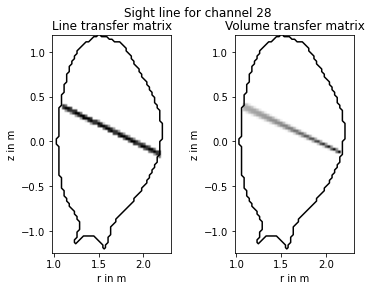

In [100]:
fig, (ax1, ax2) = plt.subplots(1,2)
fig.suptitle("Sight line for channel 28")
ax1.set_title("Line transfer matrix")
ax2.set_title("Volume transfer matrix")
ax1.set_ylabel("z in m")
ax2.set_ylabel("z in m")
ax1.set_xlabel("r in m")
ax2.set_xlabel("r in m")
ax1.contour(r_coord, z_coord, mask, levels=[0.5], colors='black')
ax2.contour(r_coord, z_coord, mask, levels=[0.5], colors='black')
ax1.imshow(transfer_line2[28]*mask,extent=[r_coord[0], r_coord[-1], z_coord[0], z_coord[-1]], cmap="binary")
ax2.imshow(transfer_vol[28],extent=[r_coord[0], r_coord[-1], z_coord[0], z_coord[-1]], cmap="binary")
plt.savefig("", bbox_inches='tight', dpi=300, transparent=True)

/home/korbi/.local/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: No contour levels were found within the data range.
  """Entry point for launching an IPython kernel.


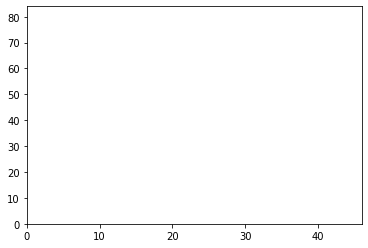

In [81]:
plt.contour(mask, levels=[0.5], colors='black')